# 1.1. Arrays

Arrays hold values of the same type at contiguous memory locations. In an array, we're usually concerned about two things - The postion/index of an element and the element itself. Different programming languages implement arrays under the hood differently and can affect the time complexity of operations you make to the array. <br>

Arrays are among the most common data structures encountered during inuterviews. Questions which ask about other topics would likely involve arrays/sequences as well. Mastery of array is essential for interviews!

### Advantages:

- Store multiple elements of the same type with one single variable name. 
- Accessing elements is fast as long as you have the index, as opposed to _linked lists_ where you have to traverse from the head.

### Disadvantages:

- Addition and removal of elements into/from the middle of an array is slow because the remaining elements need to be shifted to accomodatae the new/missing element. An exception to this is if the position to be inserted/removed is at the end of the array. 

- For certain languages where the array size is fixed, it cannot alter its size after initialization. If an insertion causes the total number of elements to exceed the size, a new array has to be allocated and the existing elements have to be copied over. The act of creating new array and transferring elements over takes O(n) time. 

## Common Terms:

- Subarray: A range of contiguous values within an array. <br>

- Subsequence: A sequence that can be derived from the given sequence by deleting some or no elements without changing the order of the remaining elements.

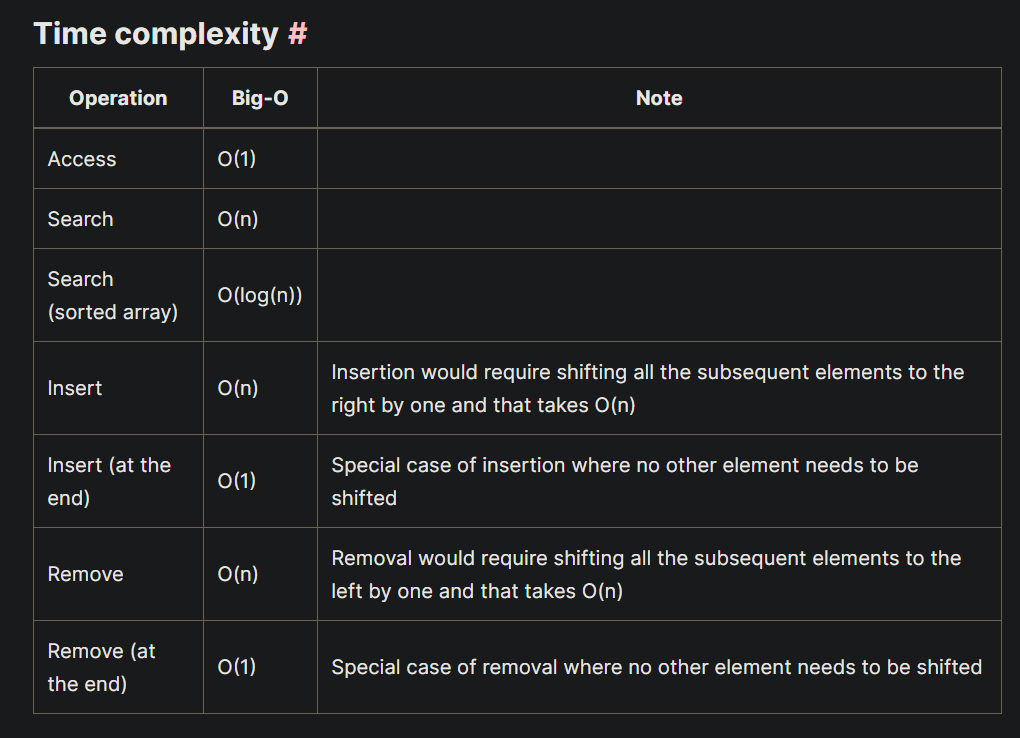

## Things to look out for during interviews

- Clarify if there are duplicate values in the array. Would the presence of duplicate values affect the answer? Does it make the question simpler or harder?
- When using index to iterate through array elements, be careful not to out of bounds. 
- Be mindful about slicing or concatenating arrays in your code. Typically, slicing and concatenating arrays would take O(n) time. Use start and inddices to demarcate a subrray/range where possible.

## Corner Cases

- Empty sequence 
- Sequence with 1 or 2 elements
- Sequence with repeated elements 
- Duplicated values in the sequence

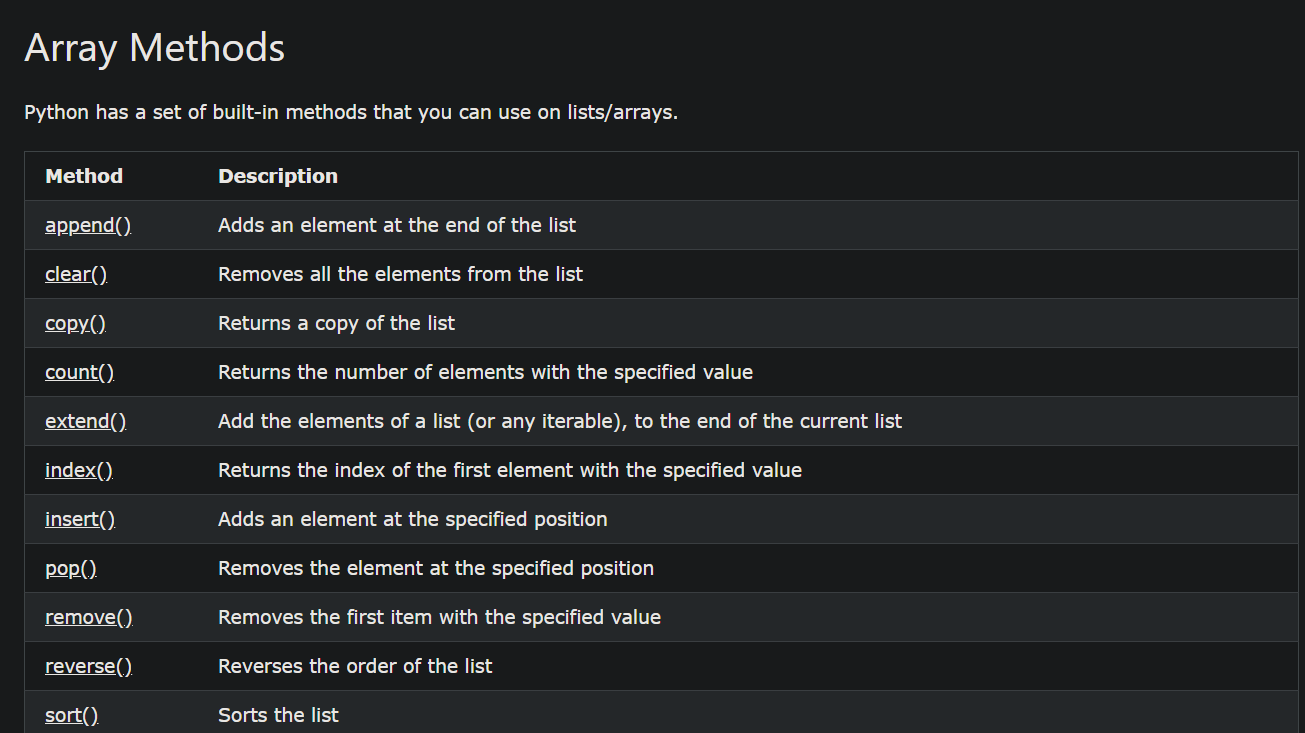

# Search, Insert and Delete in an Unsorted Array

- Search Operation: In an unsorted array, the search operation can be performed by linear traversal from the first element to the last element. 

In [1]:
arr = [12, 34, 10, 6, 40]
key = 6
for i in range(len(arr)):
    if arr[i] == key:
        print(i)


3


- Insert at the end: In an unsorted array, the insert operation is faster as compared to a sorted array because we don't have to care aobu the position at which the element is to be placed. 

In [2]:
arr.append(13)
print(arr)

[12, 34, 10, 6, 40, 13]


- Delete Operation: the element to be deleted is searched using the linear search, and then delete operation is perfomed followed by shifting the elements. 

In [6]:
print(arr)
arr.reverse()
print(arr)

[12, 34, 10, 6, 40]
[40, 6, 10, 34, 12]


### 1. Write a Python program to reverse the order of the items in the array. 

In [7]:
arr = [1, 3, 5, 3, 7, 1, 9, 3]
print(arr)

[1, 3, 5, 3, 7, 1, 9, 3]


Reversing the array:

In [10]:
arr.reverse()
print(arr)


[3, 9, 1, 7, 3, 5, 3, 1]


### 2. Write a Python program to get the number of occurences of a specified element in an array.

In [11]:
arrr = [1, 3, 5, 3, 7, 9, 3]
n = 3 
count = 0
for i in range(len(arrr)):
    if arrr[i] == n:
        count += 1
print(count)

3


## Techniques:

### Sliding Window:

In a sliding window, the two pointers usually move in the same direction will never overtake each otehr. This ensures that each value is only visited at most twice and the time complexity is still O(n). 

For most substring problems, we are given a string and need to find a substring of it which satisfy some constraints. A general way is to use a hashmap assited with two pointers. The template is given below in Python:

In [13]:
class Solution(object):
    def min_window(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: str
        """
        # Struggled with this problem for a long while.
        # Idea: Two pointers: moving end forward to find a valid window,
        #                     moving start forward to find a smaller window
        #                     counter and hash_map to determine if the window is valid or not

        # Count the frequencies for chars in t
        hash_map = dict()
        for c in t:
            if c in hash_map:
                hash_map[c] += 1
            else:
                hash_map[c] = 1

        start, end = 0, 0

        # If the minimal length doesn't change, it means there's no valid window
        min_window_length = len(s) + 1

        # Start point of the minimal window
        min_window_start = 0

        # Works as a counter of how many chars still need to be included in a window
        num_of_chars_to_be_included = len(t)

        while end < len(s):
            # If the current char is desired
            if s[end] in hash_map:
                # Then we decreased the counter, if this char is a "must-have" now, in a sense of critical value
                if hash_map[s[end]] > 0:
                    num_of_chars_to_be_included -= 1
                # And we decrease the hash_map value
                hash_map[s[end]] -= 1

            # If the current window has all the desired chars
            while num_of_chars_to_be_included == 0:
                # See if this window is smaller
                if end - start + 1 < min_window_length:
                    min_window_length = end - start + 1
                    min_window_start = start

                # if s[start] is desired, we need to update the hash_map value and the counter
                if s[start] in hash_map:
                    hash_map[s[start]] += 1
                    # Still, update the counter only if the current char is "critical"
                    if hash_map[s[start]] > 0:
                        num_of_chars_to_be_included += 1

                # Move start forward to find a smaller window
                start += 1

            # Move end forward to find another valid window
            end += 1

        if min_window_length == len(s) + 1:
            return ""
        else:
            return s[min_window_start:min_window_start + min_window_length]



__Window Sliding Technique__ is a computational technique which aims to reduce the use of nested loop and replace it with a single loop, thereby reducing the time complexity. <br>

__What is Sliding Window__? An analogy:<br>
Consider a long chain connected together. Suppose you want to apply oil in the complete chain with your hands, without pouring the oil from above. 

One way to do so is to: 
- Pick some oil, 
- apply onto a section of the chain, 
- then again pick some oil, 
- then apply it to the next section where oil is not applied yet
- and so on till the whole chain is oiled. 

Another way to do so, is to use a cloth, dip it in oil, and then hold onto one end of the chain with this cloth. Then instead of re-dipping it again and again, just slide the cloth with hand onto the next section, and next, and so on till the other end. <br>

The second way is known as the __Sliding Window Technique__ and the portion which is slided from one end to the other end, is known as __sliding window__. 

##  Prerequisite to use Sliding Window Technique:

The use of sliding window technique can be done in a very specific scenario, where the __size of window__ for computation is __fixed__ throughout the complete nested loop. Only then the time complexity can be reduced. 

## How to use Sliding Window Technique?

The general use of Sliding window technique can be demostrated as following:
- 1. Find the size of window required 
- 2. Compute the result for 1st window, i.e from the start of the DS
- 3. Then use a loop to slide the window by 1, and keep computing the result window by window. 

## Examples to illustrate the use of Sliding Window Technique

### Given an array of integers of size 'n', our aim is to calculate the maximum sum of 'k' consecutive elements in the array. 

__Naive Approach__: So, let's analyze the problem with __Brute Force Approach__. We start with first index and sum till __k-th__ element. We do it for all consecutive blocks or groups of k elements. This method requires nested _for loop_, the outer _for loop_ starts with the starting element of the block of k elements and the inner or the nested loop will add up till the k-th element.

In [14]:
def maxSum(arr, n, k):
    max_sum = -sys.maxsize-1
    for i in range(n - k +1):
        current_sum = 0
        for j in range(k):
            current_sum = current_sum + arr[i + 1]
        max_sum = max(current_sum, max_sum)
    return max_sum

__Time Complexity__: O(n*k) as it contains two nested loops. 

### Applying slidng window technique:

1. We compute the sum of the first k elements out of n terms using a linear loop and store the sum in the variable window_sum.
2. then we will graze linearly over the array till it reaches the end and simultaneously keep track of maximum sum.
3. To get the current sum of block of k elements just subtract the first element from the previous block and add the last element of the current block. 

In [15]:
def maxSums(arr, k):
    n = len(arr)
    if n < k:
        print("Invalid")
        return -1
    # computer sum of first window of size k
    window_sum = sum(arr[:k])
    first_sum = windwow_sum 
    
    # compute the sums of remaining windows by 
    # removing first element of previous 
    # window and adding last element of 
    # the current window
    
    for i in range(n-k):
        window_sum = window_sum - arr[1] + arr[i+k]
        max_sum = max(window_sum, max_sum)
    return max_sum 

__Time Complexity__ O(n)

## Two Pointers

Two pointers is amore general version of sliding window where the pointers can cross each other and be on different arrays. 

At times we come across questions in which: <br>

1. We are __given an array__, and
2. Either we need to __find a subarray__, 
3. Or, we need to __find a pair__ that __fulfills some condition. <br>

In such kind of situation we prefer to use the two pointers approach. When using two pointers every element of the array is vised at most twice, once by each of the pointers. Thus, the two-pointer approach's time complexity, in most cases, turns out to be O(n). 

### Example:

Let's assume that we have an array = [1,2,3,4,5,6], and we need to find a subarray with sum = 0. Thus we have been given the following data:<br>
- Array = [1,2,3,4,5,6]
- Desired = 9 <br>

Let's us start with the approach. We will initializize 2 pointers _start_ and _end_. As noted by the name one refers to the start of the array, and the other refers to the end of the array. <br>

We start by placing _start_ and _end_ on the left of the array. At the very beginning the subarray only consists of one element with value = 1. Thus, the sum of the subarray is 1. Because the sum is less than the desired value, then we move the pointer _end_ one unit to the right, this process will continue till we find the desired value or we have reached the end of the array. <br> 

The _end_ and _start_ pointers will move under two conditions: <br>

1. Move the _end_ pointer towards the right, i.e(_end_++1) if the current sum is smaller or greater than the desired sum,
2. Only move the _start_ pointer towards the right if the current sum was greater than the desired value. 

One can think of both operations has being _expand_(for _end_) and _shrink_(for _start_)

When we expand we __add__ the value of the current value of _end_, on the other hand, when we shrink we subtract from the current sum the value of the _start_ pointer. 

### Things to consider while designing the 2 pointer approach:

The 4 design questions that one needs to think of while working on a 2 pointer approach are:

1. When to Expand/Shrink
2. What will expansion/shrinking help us achieve?
3. How to expand/shrink?
4. Is the array in the correct order?
